### Loading the data

The dataset consists of 70,000 28x28 grayscale images of 10 fashion categories: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle Boot.

Since the class names are not included in the dataset, we store them in a variable to use for plotting later.

In [152]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


The dataset is already split into a training set of 60,000 instances and a test set of 10,000 images. We will further split the test set into 55,000 images for training and 5,000 for validation.


In [153]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


### Preprocessing the data

We scale the pixel intensities down to the 0-1 range and convert them to floats.

In [154]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0


### Building and training a model 

In [155]:
tf.random.set_seed(17)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dropout_21 (Dropout)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 300)               235500    
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_46 (Dense)            (None, 100)               30100     
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_47 (Dense)            (None, 10)              

In [156]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])


In [157]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5818 - sparse_categorical_accuracy: 0.7885 - val_loss: 0.4018 - val_sparse_categorical_accuracy: 0.8518
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4494 - sparse_categorical_accuracy: 0.8338 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8564
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4122 - sparse_categorical_accuracy: 0.8475 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8676
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3913 - sparse_categorical_accuracy: 0.8573 - val_loss: 0.3546 - val_sparse_categorical_accuracy: 0.8702
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3722 - sparse_categorical_accuracy: 0.8609 - val_loss: 0.3427 - val_sparse_categorical_accuracy: 0.8772
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3677 - spars

In [158]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 555us/step - loss: 0.3243 - sparse_categorical_accuracy: 0.8826


[0.3242592513561249, 0.8826000094413757]

### Using the model to make some predictions about a few images

In [159]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)



1/1 [==============================] - 0s 28ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.16, 0.  , 0.04, 0.  , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [160]:
y_pred = y_proba.argmax(axis=1)
y_pred


array([9, 2, 1, 1, 6])

In [161]:
y_new = y_test[:5]
y_new


array([9, 2, 1, 1, 6], dtype=uint8)

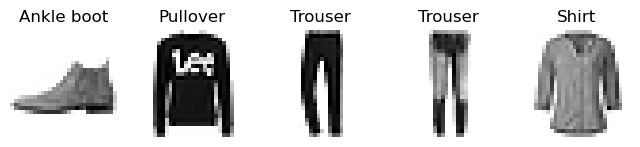

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
